In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#데이터 생성(세 군데에 데이터가 생김)
points = [np.random.randn(3) for _ in range(30)]
points.extend([np.random.randn(3) + np.array([5,5,5]) for _ in range(30)]) #중심이 (5,5,5)로 옮겨짐
points.extend([np.random.randn(3) + np.array([10,5,0]) for _ in range(30)]) #중심이 (10,5,0)로 옮겨짐
#points를 numpy array로 바꿔줌
points = np.array(points)
points

array([[ 0.58267858, -1.21083877,  2.5186279 ],
       [ 0.73085793, -1.46232362,  0.63249634],
       [ 0.68381388,  0.30921865, -0.67165426],
       [ 0.54366964, -1.44730191,  0.85309892],
       [-0.46745131,  0.67801357,  0.07414362],
       [-0.54389116, -0.73372205, -2.38312678],
       [ 1.05329542,  0.18573525, -0.2747435 ],
       [-0.89061899,  1.66555702,  0.8011018 ],
       [ 1.13426005,  2.00633763,  1.52777939],
       [-0.18885146,  0.48144209, -1.56813617],
       [ 0.65133239,  0.49866121,  0.63394956],
       [-0.61005045,  0.3856524 , -0.55005803],
       [ 0.66785007,  1.17573812, -1.68869739],
       [ 0.42592241,  0.30008367,  0.55310387],
       [ 0.7995036 ,  0.19174571, -1.42927857],
       [ 1.4983635 ,  1.23265284, -0.89981415],
       [-1.05554337,  1.79412785, -0.72245539],
       [ 0.07628909, -0.82068553,  1.33073533],
       [-0.50207893,  0.55395768,  1.26413073],
       [ 0.39571234,  1.20719326, -0.21443181],
       [ 0.07868455,  0.90404959,  0.491

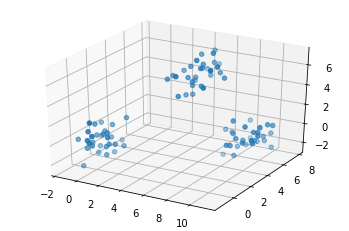

In [ ]:
#3차원 그래프 그리기
fig = plt.figure()
ax = fig.gca(projection="3d")
#ax.scatter(X,Y,Z)
ax.scatter(*zip(*points)) # == ax.scatter(points[:,0],points[:,1],points[:,2])
plt.show()

In [ ]:
k = 3
def kmeans(k,points):
  prev_assignment = []
  #step 1 : 초기 centroid(중심점) 뽑기
  centroids = points[np.random.choice(points.shape[0],size=k, replace=False)]
  #points.shape[0] = 90 / point의 크기는 90임. 
  #0~89 사이의 숫자 중 k개의 숫자 랜덤하게 뽑아서 points의 index에 넣음 
  # points[n1][0], points[n1][1], points[n1][2]가 각각 3차원에서의 x,y,z 좌표를 나타냄
  # points[n2][0], points[n2][1], points[n2][2]
  # points[n3][0], points[n3][1], points[n3][2]

  for epoch in range(10):
    #step 2 : 각각의 점들이 어느 centroid와 가장 가까운지 찾기
    assignment = [] #n번째 점이 몇 번째 centroids와 가까운지 담는 리스트(0,1,2의 값이 담김)
    for p in points:
      dists=[]
      for i,c in enumerate(centroids):
        #i에는 0,1,2, c에는 centroids vector 값이 들어감
        dists.append((((p-c)**2).sum(), i))
      assignment.append(min(dists)[1])

    #step 3 : centroid 다시 계산하기
    new_centroids = np.zeros((k, points.shape[1]))
    #points.shape[1] == 3
    counts = [0]*k
    for a,p in zip(assignment, points):
      new_centroids[a] += p
      counts[a] += 1
    for i in range(k):
      new_centroids[i] /= counts[i]
    centroids = new_centroids

    #수렴조건 확인하기
    if prev_assignment == assignment:
      break
    prev_assignment = assignment
  return assignment, centroids
  #assignment:각각의 점이 어느 점과 가장 가까운지를 담은 리스트
  #centroids : 중심점 3개의 좌표를 담은 리스트


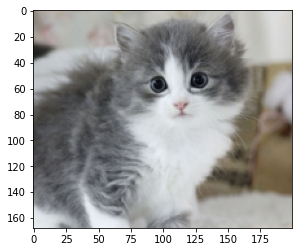

In [ ]:
from PIL import Image
im = Image.open("/content/gdrive/MyDrive/고양이.jpg")
im = im.resize((200,im.height*200//im.width)) #크기 조절하는 코드
plt.imshow(im)
plt.show()

In [ ]:
#image를 numpy RGB 형태로 바꾸기
pixels = np.array(im).reshape(-1,3)

assignment, centroids = kmeans(2, pixels)

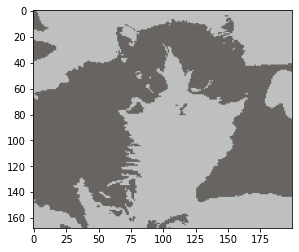

In [ ]:
for i, (a,p) in enumerate(zip(assignment, pixels)):
  pixels[i] = centroids[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3),'RGB') #자세히 알 필요X array를 image로 만들어 줌
plt.imshow(im_remastered)
plt.show()


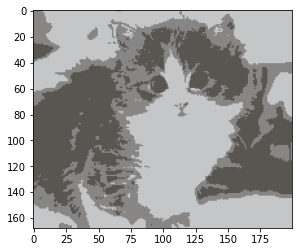

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pixels = np.array(im).reshape(-1,3)
kmeans.fit(pixels)
for a, i in zip(kmeans.labels_, range(pixels.shape[0])):
  pixels[i] = kmeans.cluster_centers_[a]

im_remastered = Image.fromarray(pixels.reshape(im.height, im.width, 3), 'RGB')
plt.imshow(im_remastered)
plt.show()